# Project on Time Series Analysis and Forecasting 

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df = pd.read_excel("Sample - Superstore.xls")
furniture = df.loc[df['Category'] == 'Furniture']

In [3]:
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

# Data Preprocessing

In [4]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City',
        'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 
        'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [5]:
furniture

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940
...,...,...
7636,2017-12-29,258.750
7632,2017-12-29,1207.840
5131,2017-12-29,101.120
7635,2017-12-29,300.980


reset index

In [6]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [7]:
furniture

,Order Date,Sales
0,2014-01-06,2573.8200
1,2014-01-07,76.7280
2,2014-01-10,51.9400
3,2014-01-11,9.9400
4,2014-01-13,879.9390
...,...,...
884,2017-12-24,1393.4940
885,2017-12-25,832.4540
886,2017-12-28,551.2568
887,2017-12-29,2330.7180


indexing with order date

In [8]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [9]:
furniture

,Sales
Order Date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-10,51.9400
2014-01-11,9.9400
2014-01-13,879.9390
...,...
2017-12-24,1393.4940
2017-12-25,832.4540
2017-12-28,551.2568


In [10]:
y = furniture['Sales'].resample('MS').mean()

In [11]:
y

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

# Visualizing Furniture Sales Time Series Data

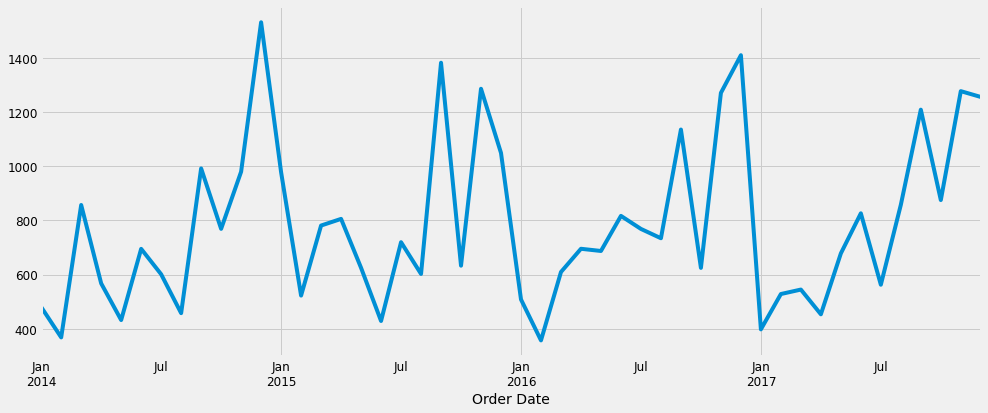

In [12]:
y.plot(figsize=(15, 6))
plt.show()

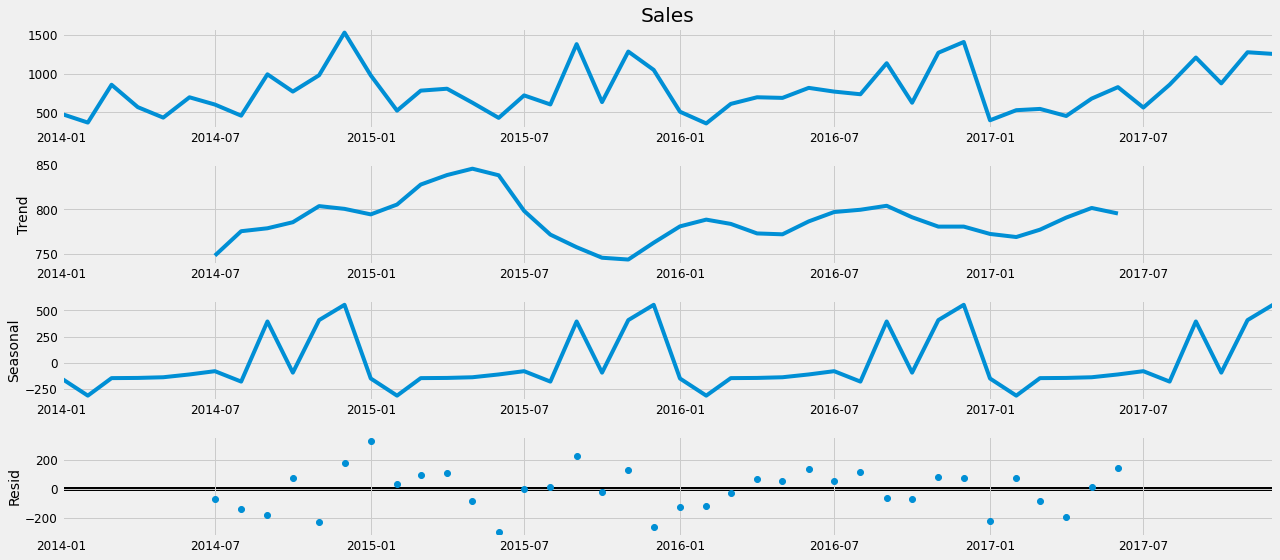

In [13]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

# Time series forecasting with ARIMA

In [14]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [31]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal
                                            )
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:784.7193402038779
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:751.4071520366712
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:495.370902750861
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:489.8305340059608
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:691.7786646563209
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:686.6467951298921
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:491.253981942631
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:491.8096508203049
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:751.0635462734646
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:724.1781119640144
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:497.04455587129786
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:491.66407712413627
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:689.6572888648599
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:685.0816372131437
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:493.19798657890607


C:\Users\acer\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:493.6293798584361
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:691.6686053818911
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:680.9064061528002
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:501.1917149410094
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:498.2211751163303
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:672.7905898082397
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:674.5758256103129
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:500.10704742471836
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:500.02052667703254
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:679.3885628133118
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:667.516372662355
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:489.64305357969687
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:482.8325730387537
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:656.5174596987935
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:652.2641487832287
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:484.71190424677354
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:484.82797724618115
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:707.881214377847
ARIMA(1

C:\Users\acer\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:493.60744981535794
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:697.3492683220145
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:684.5282208524605
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:498.8527554610268
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:493.5574635330423


C:\Users\acer\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:673.2895803422174


C:\Users\acer\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:669.4295594055128
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:495.08266708007676


C:\Users\acer\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:495.5278625867479
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:684.9765838986999
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:673.7225556805126
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:494.31121719371555
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:490.62427514879704
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:665.2664123034571
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:665.1114323081142
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:491.85420116840464


C:\Users\acer\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:492.5754708899548
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:678.4418885383614
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:666.0577882117118
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:490.8791725866541
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:484.59388060740946
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:656.5344051289056
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:653.379070504838
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:486.5632534352662
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:486.58235131829395


# Fitting the ARIMA model

In [29]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0676      0.226      0.299      0.765      -0.376       0.511
ma.L1         -1.0000      0.279     -3.590      0.000      -1.546      -0.454
ar.S.L12      -0.4807      0.147     -3.260      0.001      -0.770      -0.192
sigma2      4.108e+04   6.78e-06   6.06e+09      0.000    4.11e+04    4.11e+04


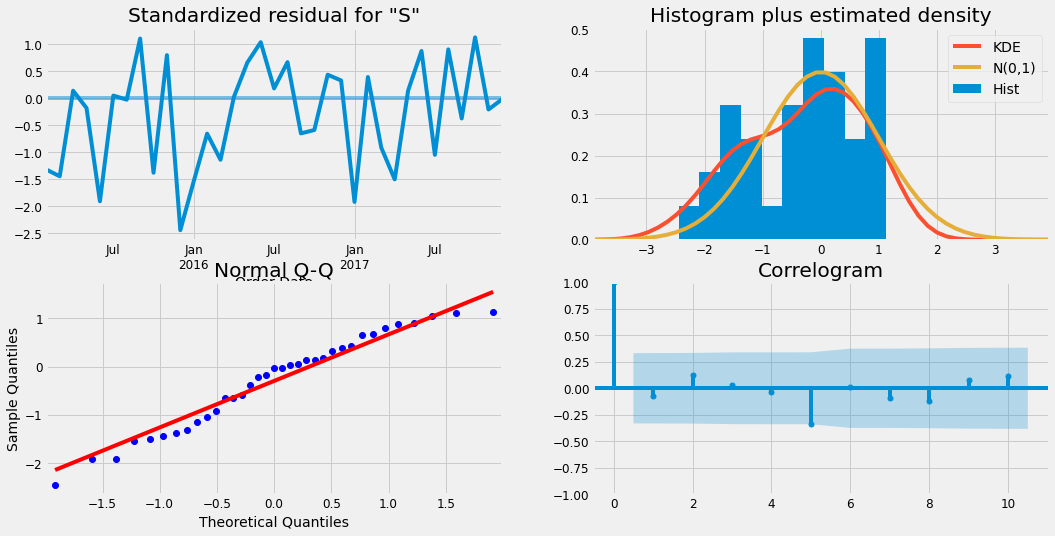

In [22]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

It is not perfect, however, our model diagnostics suggests that the model residuals are near normally distributed.

# Validating forecasts

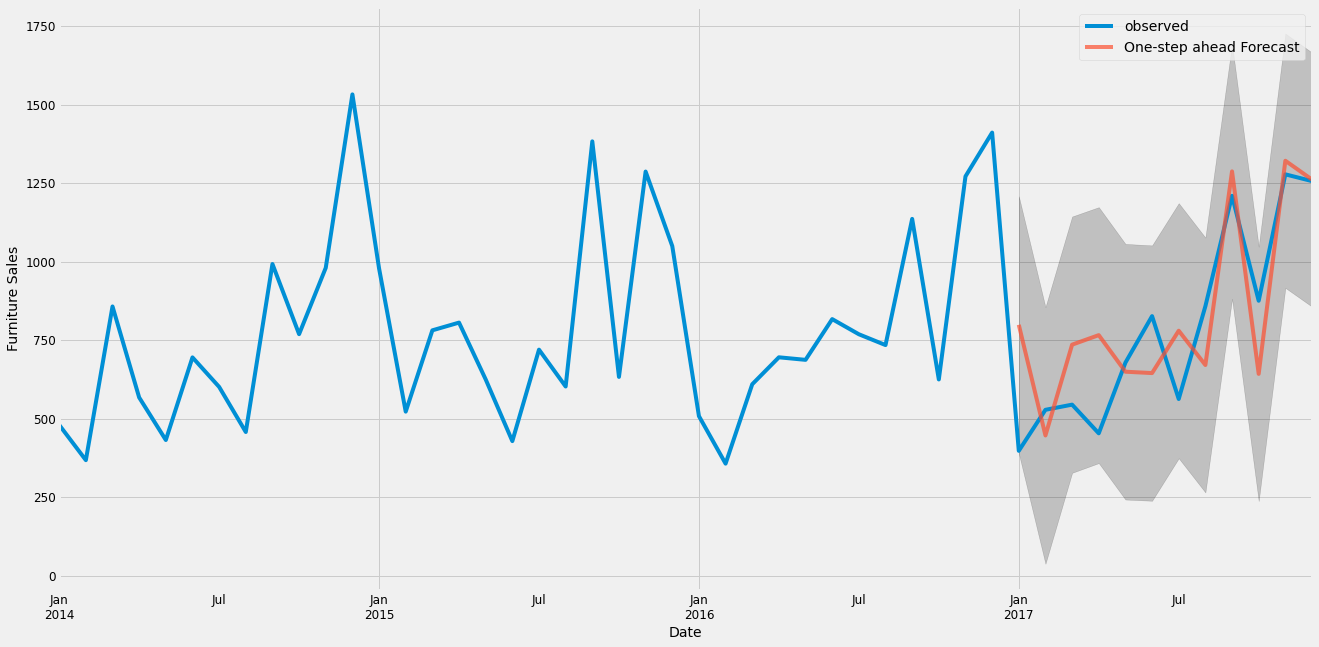

In [23]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(20, 10))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [24]:
y_forecasted = pred.predicted_mean
y_real = y['2017-01-01':]
mse = ((y_forecasted - y_real) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 39996.01


In [25]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 199.99


the smaller the MSE, the closer we are to finding the line of best fit. 

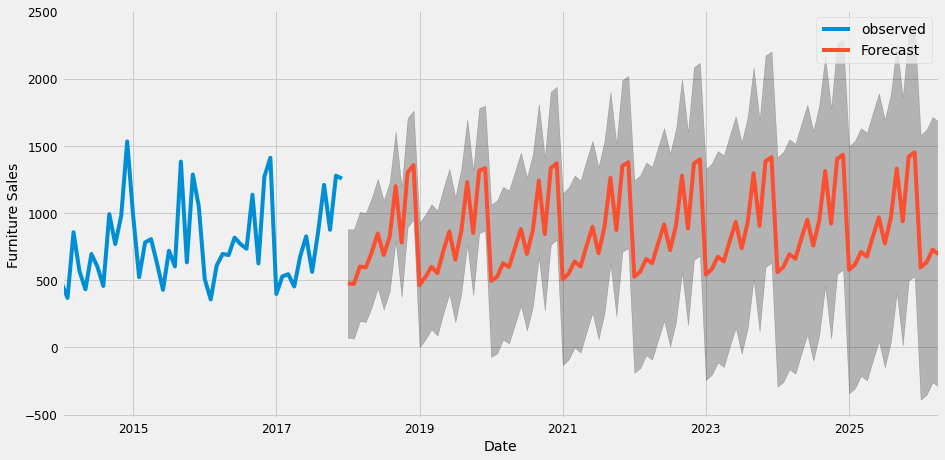

In [26]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()